In [7]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [8]:
loc_P04 = '/home/saumya/Documents/Rajesh_sir_Dip/Schlieren-Data/P04/'
# loc_P04 = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/P04/'

In [9]:
data = np.load(loc_P04+'P04.npy')

In [10]:
cropped_data = []
for k in data:
    cropped_data.append(k[270:950, 290:720])

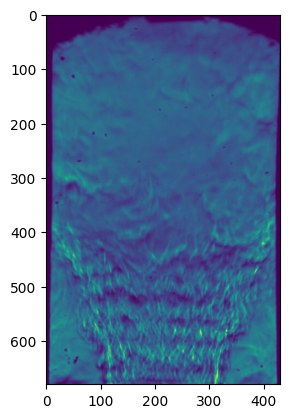

In [11]:
plt.imshow(cropped_data[99])

In [12]:
cropped_data[0].shape

(680, 430)

In [14]:
for i in range(data.shape[0]):
    exec(f'patches_{i} = patchify.patchify(cropped_data[0], (9, 9), 9)')

In [16]:
patches_5.shape

(75, 47, 9, 9)

In [17]:
%who

cropped_data	 data	 i	 k	 loc_P04	 np	 patches_0	 patches_1	 patches_10	 
patches_100	 patches_101	 patches_102	 patches_103	 patches_104	 patches_105	 patches_106	 patches_107	 patches_108	 
patches_109	 patches_11	 patches_110	 patches_111	 patches_112	 patches_113	 patches_114	 patches_115	 patches_116	 
patches_117	 patches_118	 patches_119	 patches_12	 patches_120	 patches_121	 patches_122	 patches_123	 patches_124	 
patches_125	 patches_126	 patches_127	 patches_128	 patches_129	 patches_13	 patches_130	 patches_131	 patches_132	 
patches_133	 patches_134	 patches_135	 patches_136	 patches_137	 patches_138	 patches_139	 patches_14	 patches_140	 
patches_141	 patches_142	 patches_143	 patches_144	 patches_145	 patches_146	 patches_147	 patches_148	 patches_149	 
patches_15	 patches_150	 patches_151	 patches_152	 patches_153	 patches_154	 patches_155	 patches_156	 patches_157	 
patches_158	 patches_159	 patches_16	 patches_160	 patches_161	 patches_162	 patches_163	 patches_164	 pa

In [20]:
patches_1.shape

(75, 47, 9, 9)

In [21]:
patches_1.shape
for i in range(patches_1.shape[0]):
    for j in range(patches_1.shape[1]):
        exec(f'mean_{}')

IndentationError: expected an indented block (2602714213.py, line 4)